In [ ]:
https://drive.google.com/file/d/1etGP85wJWsgqbsh3gX5oxc8dPKLMA1eT/view

https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv
https://raw.githubusercontent.com/justmarkham/DAT8/master/data/beer.txt
https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/US_Crime_Rates/US_Crime_Rates_1960_2014.csv
https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/datasets.csv


In [2]:
import pandas as pd

# chipotle data set

In [3]:
chipotle = pd.read_table("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv")
chipotle

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [43]:
item_price = chipotle['item_price'].str.replace('$', '').astype(float)

In [44]:
item_price

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

In [49]:
total_price = chipotle['quantity'] * item_price

In [50]:
chipotle['total_price'] = '$' + total_price.astype(str)

In [51]:
chipotle[['quantity','item_price','total_price']]

,quantity,item_price,total_price
0,1,$2.39,$2.39
1,1,$3.39,$3.39
2,1,$3.39,$3.39
3,1,$2.39,$2.39
4,2,$16.98,$33.96
...,...,...,...
4617,1,$11.75,$11.75
4618,1,$11.75,$11.75
4619,1,$11.25,$11.25
4620,1,$8.75,$8.75


In [106]:
orders = chipotle[['item_name','choice_description','quantity']]

In [117]:
orders

,item_name,choice_description,quantity
0,Chips and Fresh Tomato Salsa,NaN,1
1,Izze,[Clementine],1
2,Nantucket Nectar,[Apple],1
3,Chips and Tomatillo-Green Chili Salsa,NaN,1
4,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",2
...,...,...,...
4617,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",1
4618,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",1
4619,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",1
4620,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",1


In [107]:
items = orders.groupby('item_name').sum().sort_values('quantity')

In [111]:
# Most ordered item
items.tail(1)

,quantity
item_name,
Chicken Bowl,761


In [113]:
orderidx = items.tail(1).index

In [133]:
orderidx.values[0]

'Chicken Bowl'

In [124]:
# all possible choice description for this most ordered item 

orders['choice_description'][orders['item_name'] == orderidx.values[0]]

4       [Tomatillo-Red Chili Salsa (Hot), [Black Beans...
5       [Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...
13      [Fresh Tomato Salsa, [Fajita Vegetables, Rice,...
19      [Tomatillo Red Chili Salsa, [Fajita Vegetables...
26      [Roasted Chili Corn Salsa (Medium), [Pinto Bea...
                              ...                        
4590    [Roasted Chili Corn Salsa, [Rice, Black Beans,...
4591    [Tomatillo Red Chili Salsa, [Rice, Black Beans...
4595    [Tomatillo Green Chili Salsa, [Rice, Black Bea...
4599        [Roasted Chili Corn Salsa, [Cheese, Lettuce]]
4604    [Fresh Tomato Salsa, [Rice, Black Beans, Chees...
Name: choice_description, Length: 726, dtype: object

# beer data set

In [137]:
beer = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/beer.txt",sep=" ")
beer

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


In [143]:
#Name of the beer with lowest calories

beer['name'][beer['calories'] == beer['calories'].min()]

15    Pabst_Extra_Light
Name: name, dtype: object

In [147]:
# Average cost of beer with alcohol level in between 2.3 - 4.2 

beer[beer['alcohol'].between(2.3,4.2)].cost.mean()

0.445

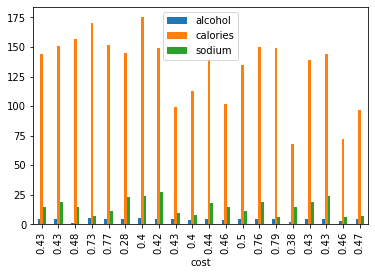

In [155]:
# Graph to see effect of factors like "alcohol","calories","sodium" on beer's cost 

import pandas as pd
import matplotlib.pyplot as plt

beer.plot(x="cost", y=["alcohol","calories","sodium"], kind="bar")
plt.show()


In [158]:
# Factors of top 5 costly beers

beer.sort_values(by='cost', ascending=False).iloc[:5]

,name,calories,sodium,alcohol,cost
14,Kirin,149,6,5.0,0.79
4,Heineken,152,11,5.0,0.77
13,Becks,150,19,4.7,0.76
3,Kronenbourg,170,7,5.2,0.73
12,Michelob_Light,135,11,4.2,0.50


In [167]:
# Creating new index for beer data set 
beer['beer_id'] = round(beer.index.values[0] + beer.calories + beer.sodium + beer.alcohol)

In [170]:
beer = beer.set_index('beer_id',drop=True)

In [171]:
beer

,name,calories,sodium,alcohol,cost
beer_id,,,,,
164.0,Budweiser,144,15,4.7,0.43
175.0,Schlitz,151,19,4.9,0.43
173.0,Lowenbrau,157,15,0.9,0.48
182.0,Kronenbourg,170,7,5.2,0.73
168.0,Heineken,152,11,5.0,0.77
173.0,Old_Milwaukee,145,23,4.6,0.28
204.0,Augsberger,175,24,5.5,0.40
181.0,Srohs_Bohemian_Style,149,27,4.7,0.42
113.0,Miller_Lite,99,10,4.3,0.43


# US_Crime_Rates data set

In [172]:
crimerate= pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/US_Crime_Rates/US_Crime_Rates_1960_2014.csv')

In [176]:
crimerate.head()

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [ ]:
crimerate.Year =  pd.to_datetime(crimerate.Year,format='%Y')

In [188]:
# Resampling data over 5 years frequency To know average number of Violent Crimes in each 5 year
resampled = crimerate.set_index('Year',drop=True)['Violent'].resample('5AS') 

In [189]:
resampled

In [190]:
resampled.mean()

Year
1960-01-01     312110.0
1965-01-01     514876.0
1970-01-01     848170.0
1975-01-01    1073416.0
1980-01-01    1312020.0
1985-01-01    1502845.6
1990-01-01    1889572.0
1995-01-01    1615837.6
2000-01-01    1406481.4
2005-01-01    1387129.8
2010-01-01    1214403.4
Freq: 5AS-JAN, Name: Violent, dtype: float64

# vincentarelbundock data set

In [192]:
dock = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/datasets.csv')

In [193]:
dock

,Package,Item,Title,Rows,Cols,n_binary,n_character,n_factor,n_logical,n_numeric,CSV,Doc
0,AER,Affairs,Fair's Extramarital Affairs Data,601,9,2,0,2,0,7,https://vincentarelbundock.github.io/Rdatasets...,https://vincentarelbundock.github.io/Rdatasets...
1,AER,ArgentinaCPI,Consumer Price Index in Argentina,80,2,0,0,0,0,2,https://vincentarelbundock.github.io/Rdatasets...,https://vincentarelbundock.github.io/Rdatasets...
2,AER,BankWages,Bank Wages,474,4,2,0,3,0,1,https://vincentarelbundock.github.io/Rdatasets...,https://vincentarelbundock.github.io/Rdatasets...
3,AER,BenderlyZwick,"Benderly and Zwick Data: Inflation, Growth and...",31,5,0,0,0,0,5,https://vincentarelbundock.github.io/Rdatasets...,https://vincentarelbundock.github.io/Rdatasets...
4,AER,BondYield,Bond Yield Data,60,2,0,0,0,0,2,https://vincentarelbundock.github.io/Rdatasets...,https://vincentarelbundock.github.io/Rdatasets...
...,...,...,...,...,...,...,...,...,...,...,...,...
1709,vcd,UKSoccer,UK Soccer Scores,25,3,0,0,2,0,1,https://vincentarelbundock.github.io/Rdatasets...,https://vincentarelbundock.github.io/Rdatasets...
1710,vcd,VisualAcuity,Visual Acuity in Left and Right Eyes,32,4,1,0,3,0,1,https://vincentarelbundock.github.io/Rdatasets...,https://vincentarelbundock.github.io/Rdatasets...
1711,vcd,VonBort,Von Bortkiewicz Horse Kicks Data,280,4,1,0,2,0,2,https://vincentarelbundock.github.io/Rdatasets...,https://vincentarelbundock.github.io/Rdatasets...
1712,vcd,WeldonDice,Weldon's Dice Data,11,2,0,0,1,0,1,https://vincentarelbundock.github.io/Rdatasets...,https://vincentarelbundock.github.io/Rdatasets...


In [197]:
# Removing duplicate 

dock = dock.drop_duplicates(['Item','Title'])

In [199]:
dock.shape

(1705, 12)